In [1]:
# %%capture
# ! pip install pandas 
# ! pip install openpyxl
# ! pip install seaborn
# ! pip install matplotlib
# ! pip install scikit-learn
# ! pip install Xgboost


In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


 # Data sources
 **'IP-21 Daily average'**

 **'DCS Data'**

 **'Moisture in Chlorine'**

 **'Fresh H2SO4 Conc'**

 **'Spent Acid Conc.'**

 **'Spent product'**

In [2]:
daily_avg=pd.read_csv("ip_21_daily_average.csv")
daily_avg.head()

,Date,Sample Time,Chilled Water Temperature (oC),T-1440 Sulfuric Acid Temperature (oC),T-1430 Sulfuric Acid Temperature (oC),T-1420 Sulfuric Acid Temperature (oC),Chlorine Gas Flowrate (Nm3/h),T-1440 Chlorine Gas Pressure (kPa),T-1430 Chlorine Gas Pressure (kPa),T-1420 Chlorine Gas Pressure (kPa),T-1440 Chlorine Gas Temperature (oC),T-1430 Chlorine Gas Temperature (oC),T-1420 Chlorine Gas Temperature (oC)
0,2024-06-09,2024-06-09 15:29:13.954857728+00:00,8.963711,15.081006,15.197703,16.727859,4220.014443,14.447556,14.691228,17.809678,17.089994,16.803816,18.536427
1,2024-06-10,2024-06-10 11:59:30+00:00,9.263807,14.345459,14.635845,15.882722,4219.401658,14.252345,14.502741,17.614336,16.440555,16.266364,17.762898
2,2024-06-11,2024-06-11 03:29:56.276849664+00:00,8.788853,13.916135,14.338532,15.220262,4220.721496,14.313519,14.564308,17.631447,16.056400,15.958017,17.140863
3,2024-07-28,2024-07-28 15:32:57.097729536+00:00,9.193524,14.370555,14.713549,15.849251,4152.823212,14.730324,15.057696,18.411648,16.164738,16.059895,17.376524
4,2024-07-29,2024-07-29 11:59:50.904033280+00:00,9.221429,14.271846,14.632055,15.793317,4163.603853,14.879651,15.192012,18.338030,15.991915,15.857162,17.202023


In [3]:
daily_avg.isnull().sum()

Date                                     0
Sample Time                              0
Chilled Water Temperature (oC)           0
T-1440 Sulfuric Acid Temperature (oC)    0
T-1430 Sulfuric Acid Temperature (oC)    0
T-1420 Sulfuric Acid Temperature (oC)    0
Chlorine Gas Flowrate (Nm3/h)            0
T-1440 Chlorine Gas Pressure (kPa)       0
T-1430 Chlorine Gas Pressure (kPa)       0
T-1420 Chlorine Gas Pressure (kPa)       0
T-1440 Chlorine Gas Temperature (oC)     0
T-1430 Chlorine Gas Temperature (oC)     0
T-1420 Chlorine Gas Temperature (oC)     0
dtype: int64

In [4]:
daily_avg.info() # check the data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   68 non-null     object 
 1   Sample Time                            68 non-null     object 
 2   Chilled Water Temperature (oC)         68 non-null     float64
 3   T-1440 Sulfuric Acid Temperature (oC)  68 non-null     float64
 4   T-1430 Sulfuric Acid Temperature (oC)  68 non-null     float64
 5   T-1420 Sulfuric Acid Temperature (oC)  68 non-null     float64
 6   Chlorine Gas Flowrate (Nm3/h)          68 non-null     float64
 7   T-1440 Chlorine Gas Pressure (kPa)     68 non-null     float64
 8   T-1430 Chlorine Gas Pressure (kPa)     68 non-null     float64
 9   T-1420 Chlorine Gas Pressure (kPa)     68 non-null     float64
 10  T-1440 Chlorine Gas Temperature (oC)   68 non-null     float64
 11  T-1430 C

In [5]:
daily_avg['Date'] = pd.to_datetime(
    daily_avg['Date'], 
    format='%Y-%m-%d',
).dt.strftime('%y/%m/%d')

# Adding new columns

**Read fresh_h2s04_conc**

In [6]:
fresh_h2s04_conc=pd.read_csv("fresh_h2s04_conc.csv")
fresh_h2s04_conc.head()


,Date,Time,Sample Point,Test,Result
0,07/06/2024 0:00,22:00:00,Fresh Sulphuric Acid (Tanker) [V-1441],Conc as H2SO4,98.0
1,15/06/2024 0:00,11:00:00,Fresh Sulphuric Acid (Tanker) [V-1441],Conc as H2SO4,98.0
2,12/07/2024 0:00,11:00:00,Fresh Sulphuric Acid (Tanker) [V-1441],Conc as H2SO4,98.0
3,28/07/2024 0:00,5:00:00,Fresh Sulphuric Acid (Tanker) [V-1441],Conc as H2SO4,98.3
4,23/08/2024 0:00,23:00:00,Fresh Sulphuric Acid (Tanker) [V-1441],Conc as H2SO4,98.1


In [7]:
fresh_h2s04_conc['Date'] = pd.to_datetime(
    fresh_h2s04_conc['Date'], 
    format='%d/%m/%Y %H:%M'
).dt.strftime('%y/%m/%d')

In [8]:
fresh_h2s04_conc.head()

,Date,Time,Sample Point,Test,Result
0,24/06/07,22:00:00,Fresh Sulphuric Acid (Tanker) [V-1441],Conc as H2SO4,98.0
1,24/06/15,11:00:00,Fresh Sulphuric Acid (Tanker) [V-1441],Conc as H2SO4,98.0
2,24/07/12,11:00:00,Fresh Sulphuric Acid (Tanker) [V-1441],Conc as H2SO4,98.0
3,24/07/28,5:00:00,Fresh Sulphuric Acid (Tanker) [V-1441],Conc as H2SO4,98.3
4,24/08/23,23:00:00,Fresh Sulphuric Acid (Tanker) [V-1441],Conc as H2SO4,98.1


**Read spent_product**

In [9]:
spent_product=pd.read_csv("spent_product.csv")
spent_product.head()

,Date,Time,Sample Point,Test,Result
0,01/06/2024 0:00,8:30:00,Spent Product (P-2510),Conc as H2SO4,96.0
1,02/06/2024 0:00,9:00:00,Spent Product (P-2510),Conc as H2SO4,96.0
2,03/06/2024 0:00,8:30:00,Spent Product (P-2510),Conc as H2SO4,96.0
3,04/06/2024 0:00,8:30:00,Spent Product (P-2510),Conc as H2SO4,96.0
4,05/06/2024 0:00,8:30:00,Spent Product (P-2510),Conc as H2SO4,96.0


In [10]:
spent_product['Date'] = pd.to_datetime(
    spent_product['Date'], 
    format='%d/%m/%Y %H:%M'
).dt.strftime('%y/%m/%d')

In [11]:
spent_product.head()

,Date,Time,Sample Point,Test,Result
0,24/06/01,8:30:00,Spent Product (P-2510),Conc as H2SO4,96.0
1,24/06/02,9:00:00,Spent Product (P-2510),Conc as H2SO4,96.0
2,24/06/03,8:30:00,Spent Product (P-2510),Conc as H2SO4,96.0
3,24/06/04,8:30:00,Spent Product (P-2510),Conc as H2SO4,96.0
4,24/06/05,8:30:00,Spent Product (P-2510),Conc as H2SO4,96.0


**Read spent_acid_conc**

In [12]:
spent_acid_conc=pd.read_csv("spent_acid_conc.csv")
spent_acid_conc.head()

,Date,Time,Sample Point,Test,Result,Specification
0,01/06/2024 0:00,3:00:00,Spent Sulphuric Acid (V-1421),H2SO4,80.0,80.00.. wt.%
1,01/06/2024 0:00,5:45:00,Spent Sulphuric Acid (V-1421),H2SO4,80.0,80.00.. wt.%
2,02/06/2024 0:00,2:00:00,Spent Sulphuric Acid (V-1421),H2SO4,80.8,80.00.. wt.%
3,02/06/2024 0:00,9:00:00,Spent Sulphuric Acid (V-1421),H2SO4,80.0,80.00.. wt.%
4,02/06/2024 0:00,15:00:00,Spent Sulphuric Acid (V-1421),H2SO4,NaN,80.00.. wt.%


In [13]:
spent_acid_conc['Date'] = pd.to_datetime(
    spent_acid_conc['Date'], 
    format='%d/%m/%Y %H:%M'
).dt.strftime('%y/%m/%d')

In [15]:
spent_acid_conc.head()

,Date,Time,Sample Point,Test,Result,Specification
0,24/06/01,3:00:00,Spent Sulphuric Acid (V-1421),H2SO4,80.0,80.00.. wt.%
1,24/06/01,5:45:00,Spent Sulphuric Acid (V-1421),H2SO4,80.0,80.00.. wt.%
2,24/06/02,2:00:00,Spent Sulphuric Acid (V-1421),H2SO4,80.8,80.00.. wt.%
3,24/06/02,9:00:00,Spent Sulphuric Acid (V-1421),H2SO4,80.0,80.00.. wt.%
4,24/06/02,15:00:00,Spent Sulphuric Acid (V-1421),H2SO4,NaN,80.00.. wt.%


**Read DCS_data**

In [14]:
dcs_data=pd.read_csv("dcs_data.csv")
dcs_data.head()

,Date,Time,Spent Plant Feedrate(L/H)
0,31/12/2024 0:00,0:02:00,149.75
1,30/12/2024 0:00,0:02:00,-0.13
2,29/12/2024 0:00,0:02:00,-0.13
3,28/12/2024 0:00,0:02:00,-0.13
4,27/12/2024 0:00,0:02:00,-0.13


In [15]:
dcs_data['Date'] = pd.to_datetime(
    dcs_data['Date'], 
    format='%d/%m/%Y %H:%M'
).dt.strftime('%y/%m/%d')

In [16]:
dcs_data.head()

,Date,Time,Spent Plant Feedrate(L/H)
0,24/12/31,0:02:00,149.75
1,24/12/30,0:02:00,-0.13
2,24/12/29,0:02:00,-0.13
3,24/12/28,0:02:00,-0.13
4,24/12/27,0:02:00,-0.13


**merge with DSC data(H2SO4 dosing rate)**

In [18]:
# Ensure both Date columns are in datetime format with the desired format
daily_avg['Date'] = pd.to_datetime(daily_avg['Date'], format='%y/%m/%d')
dcs_data['Date'] = pd.to_datetime(dcs_data['Date'], format='%y/%m/%d')

# Merge DataFrames on the 'Date' column

merged_df = pd.merge(daily_avg, dcs_data[['Date', 'Spent Plant Feedrate(L/H)']], on='Date', how='left')

# Add the 'Result' column to the daily_avg DataFrame
daily_avg['DSC_data_dosing_rate'] = merged_df['Spent Plant Feedrate(L/H)']

In [20]:
daily_avg.head()

,Date,Sample Time,Chilled Water Temperature (oC),T-1440 Sulfuric Acid Temperature (oC),T-1430 Sulfuric Acid Temperature (oC),T-1420 Sulfuric Acid Temperature (oC),Chlorine Gas Flowrate (Nm3/h),T-1440 Chlorine Gas Pressure (kPa),T-1430 Chlorine Gas Pressure (kPa),T-1420 Chlorine Gas Pressure (kPa),T-1440 Chlorine Gas Temperature (oC),T-1430 Chlorine Gas Temperature (oC),T-1420 Chlorine Gas Temperature (oC),DSC_data_dosing_rate
0,2024-06-09,2024-06-09 15:29:13.954857728+00:00,8.963711,15.081006,15.197703,16.727859,4220.014443,14.447556,14.691228,17.809678,17.089994,16.803816,18.536427,141.70
1,2024-06-10,2024-06-10 11:59:30+00:00,9.263807,14.345459,14.635845,15.882722,4219.401658,14.252345,14.502741,17.614336,16.440555,16.266364,17.762898,142.22
2,2024-06-11,2024-06-11 03:29:56.276849664+00:00,8.788853,13.916135,14.338532,15.220262,4220.721496,14.313519,14.564308,17.631447,16.056400,15.958017,17.140863,-0.16
3,2024-07-28,2024-07-28 15:32:57.097729536+00:00,9.193524,14.370555,14.713549,15.849251,4152.823212,14.730324,15.057696,18.411648,16.164738,16.059895,17.376524,124.63
4,2024-07-29,2024-07-29 11:59:50.904033280+00:00,9.221429,14.271846,14.632055,15.793317,4163.603853,14.879651,15.192012,18.338030,15.991915,15.857162,17.202023,121.93


**merge with fresh H2SO4 conc**

In [19]:
# Ensure both Date columns are in datetime format with the desired format
daily_avg['Date'] = pd.to_datetime(daily_avg['Date'], format='%y/%m/%d')
fresh_h2s04_conc['Date'] = pd.to_datetime(fresh_h2s04_conc['Date'], format='%y/%m/%d')

# Merge DataFrames on the 'Date' column
# Merge DataFrames on the 'Date' column
merged_df = pd.merge(daily_avg, fresh_h2s04_conc[['Date', 'Result']], on='Date', how='left')

# Add the 'Result' column to the daily_avg DataFrame
daily_avg['Result_from_fresh_h2s04_conc'] = merged_df['Result']



**merge with spent product**

In [20]:
# Ensure both Date columns are in datetime format
daily_avg['Date'] = pd.to_datetime(daily_avg['Date'], format='%y/%m/%d')
spent_product['Date'] = pd.to_datetime(spent_product['Date'], format='%y/%m/%d')

# Merge DataFrames on the 'Date' column
merged_df = pd.merge(daily_avg, spent_product[['Date', 'Result']], on='Date', how='left')

# Add the 'Result' column to the daily_avg DataFrame
daily_avg['Result_from_spent_product'] = merged_df['Result']



In [21]:
# merge Result_from_fresh_h2s04_conc and Result_from_spent_product
daily_avg['H2SO4 conc.'] = daily_avg['Result_from_fresh_h2s04_conc'].combine_first(daily_avg['Result_from_spent_product'])

**merge with spend acid conc**

In [22]:
# Ensure both Date columns are in datetime format
daily_avg['Date'] = pd.to_datetime(daily_avg['Date'], format='%y/%m/%d')
spent_acid_conc['Date'] = pd.to_datetime(spent_acid_conc['Date'], format='%y/%m/%d')

# Merge DataFrames on the 'Date' column
merged_df = pd.merge(daily_avg, spent_acid_conc[['Date', 'Result']], on='Date', how='left')

# Add the 'Result' column to the daily_avg DataFrame
daily_avg['spent_H2SO4_conc'] = merged_df['Result']



In [23]:
daily_avg = daily_avg.drop(columns=['Result_from_fresh_h2s04_conc', 'Result_from_spent_product'])


In [24]:

daily_avg["H2SO4 conc."]=daily_avg["H2SO4 conc."].fillna(daily_avg["H2SO4 conc."].mean())

daily_avg.head()

,Date,Sample Time,Chilled Water Temperature (oC),T-1440 Sulfuric Acid Temperature (oC),T-1430 Sulfuric Acid Temperature (oC),T-1420 Sulfuric Acid Temperature (oC),Chlorine Gas Flowrate (Nm3/h),T-1440 Chlorine Gas Pressure (kPa),T-1430 Chlorine Gas Pressure (kPa),T-1420 Chlorine Gas Pressure (kPa),T-1440 Chlorine Gas Temperature (oC),T-1430 Chlorine Gas Temperature (oC),T-1420 Chlorine Gas Temperature (oC),DSC_data_dosing_rate,H2SO4 conc.,spent_H2SO4_conc
0,2024-06-09,2024-06-09 15:29:13.954857728+00:00,8.963711,15.081006,15.197703,16.727859,4220.014443,14.447556,14.691228,17.809678,17.089994,16.803816,18.536427,141.70,96.000000,80.1
1,2024-06-10,2024-06-10 11:59:30+00:00,9.263807,14.345459,14.635845,15.882722,4219.401658,14.252345,14.502741,17.614336,16.440555,16.266364,17.762898,142.22,96.000000,80.4
2,2024-06-11,2024-06-11 03:29:56.276849664+00:00,8.788853,13.916135,14.338532,15.220262,4220.721496,14.313519,14.564308,17.631447,16.056400,15.958017,17.140863,-0.16,95.918519,81.0
3,2024-07-28,2024-07-28 15:32:57.097729536+00:00,9.193524,14.370555,14.713549,15.849251,4152.823212,14.730324,15.057696,18.411648,16.164738,16.059895,17.376524,124.63,98.300000,82.0
4,2024-07-29,2024-07-29 11:59:50.904033280+00:00,9.221429,14.271846,14.632055,15.793317,4163.603853,14.879651,15.192012,18.338030,15.991915,15.857162,17.202023,121.93,96.000000,79.4


In [27]:
daily_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Date                                   68 non-null     datetime64[ns]
 1   Sample Time                            68 non-null     object        
 2   Chilled Water Temperature (oC)         68 non-null     float64       
 3   T-1440 Sulfuric Acid Temperature (oC)  68 non-null     float64       
 4   T-1430 Sulfuric Acid Temperature (oC)  68 non-null     float64       
 5   T-1420 Sulfuric Acid Temperature (oC)  68 non-null     float64       
 6   Chlorine Gas Flowrate (Nm3/h)          68 non-null     float64       
 7   T-1440 Chlorine Gas Pressure (kPa)     68 non-null     float64       
 8   T-1430 Chlorine Gas Pressure (kPa)     68 non-null     float64       
 9   T-1420 Chlorine Gas Pressure (kPa)     68 non-null     float64     

# Calculate moisture in cholorine 

**Formula for calculating moisture**

**[{(H2SO4 Dosing Rate/1000)*density}*(Fresh H2SO4 Conc - Spent H2SO4 Conc)]/[Chlorine Gas Flowrate*density]10000**


In [26]:
def calculate_moisture(row):
    dosing_rate = row['DSC_data_dosing_rate']
    fresh_conc = row['H2SO4 conc.']
    spent_conc = row['spent_H2SO4_conc']
    gas_flowrate = row['Chlorine Gas Flowrate (Nm3/h)']
    h2so4_density = 1800
    C_density = 3.16
    
    # Apply the formula
    # Apply the formula
    moisture = ((((dosing_rate / 1000) * h2so4_density) * ((fresh_conc - spent_conc)/100))/ (gas_flowrate * C_density))*10000
    return moisture

# Apply the formula to each row and store the result in a new column
daily_avg['Moisture'] = daily_avg.apply(calculate_moisture, axis=1)

# Preview the DataFrame
daily_avg.head()

,Date,Sample Time,Chilled Water Temperature (oC),T-1440 Sulfuric Acid Temperature (oC),T-1430 Sulfuric Acid Temperature (oC),T-1420 Sulfuric Acid Temperature (oC),Chlorine Gas Flowrate (Nm3/h),T-1440 Chlorine Gas Pressure (kPa),T-1430 Chlorine Gas Pressure (kPa),T-1420 Chlorine Gas Pressure (kPa),T-1440 Chlorine Gas Temperature (oC),T-1430 Chlorine Gas Temperature (oC),T-1420 Chlorine Gas Temperature (oC),DSC_data_dosing_rate,H2SO4 conc.,spent_H2SO4_conc,Moisture
0,2024-06-09,2024-06-09 15:29:13.954857728+00:00,8.963711,15.081006,15.197703,16.727859,4220.014443,14.447556,14.691228,17.809678,17.089994,16.803816,18.536427,141.70,96.000000,80.1,30.411543
1,2024-06-10,2024-06-10 11:59:30+00:00,9.263807,14.345459,14.635845,15.882722,4219.401658,14.252345,14.502741,17.614336,16.440555,16.266364,17.762898,142.22,96.000000,80.4,29.951586
2,2024-06-11,2024-06-11 03:29:56.276849664+00:00,8.788853,13.916135,14.338532,15.220262,4220.721496,14.313519,14.564308,17.631447,16.056400,15.958017,17.140863,-0.16,95.918519,81.0,-0.032214
3,2024-07-28,2024-07-28 15:32:57.097729536+00:00,9.193524,14.370555,14.713549,15.849251,4152.823212,14.730324,15.057696,18.411648,16.164738,16.059895,17.376524,124.63,98.300000,82.0,27.864559
4,2024-07-29,2024-07-29 11:59:50.904033280+00:00,9.221429,14.271846,14.632055,15.793317,4163.603853,14.879651,15.192012,18.338030,15.991915,15.857162,17.202023,121.93,96.000000,79.4,27.690748


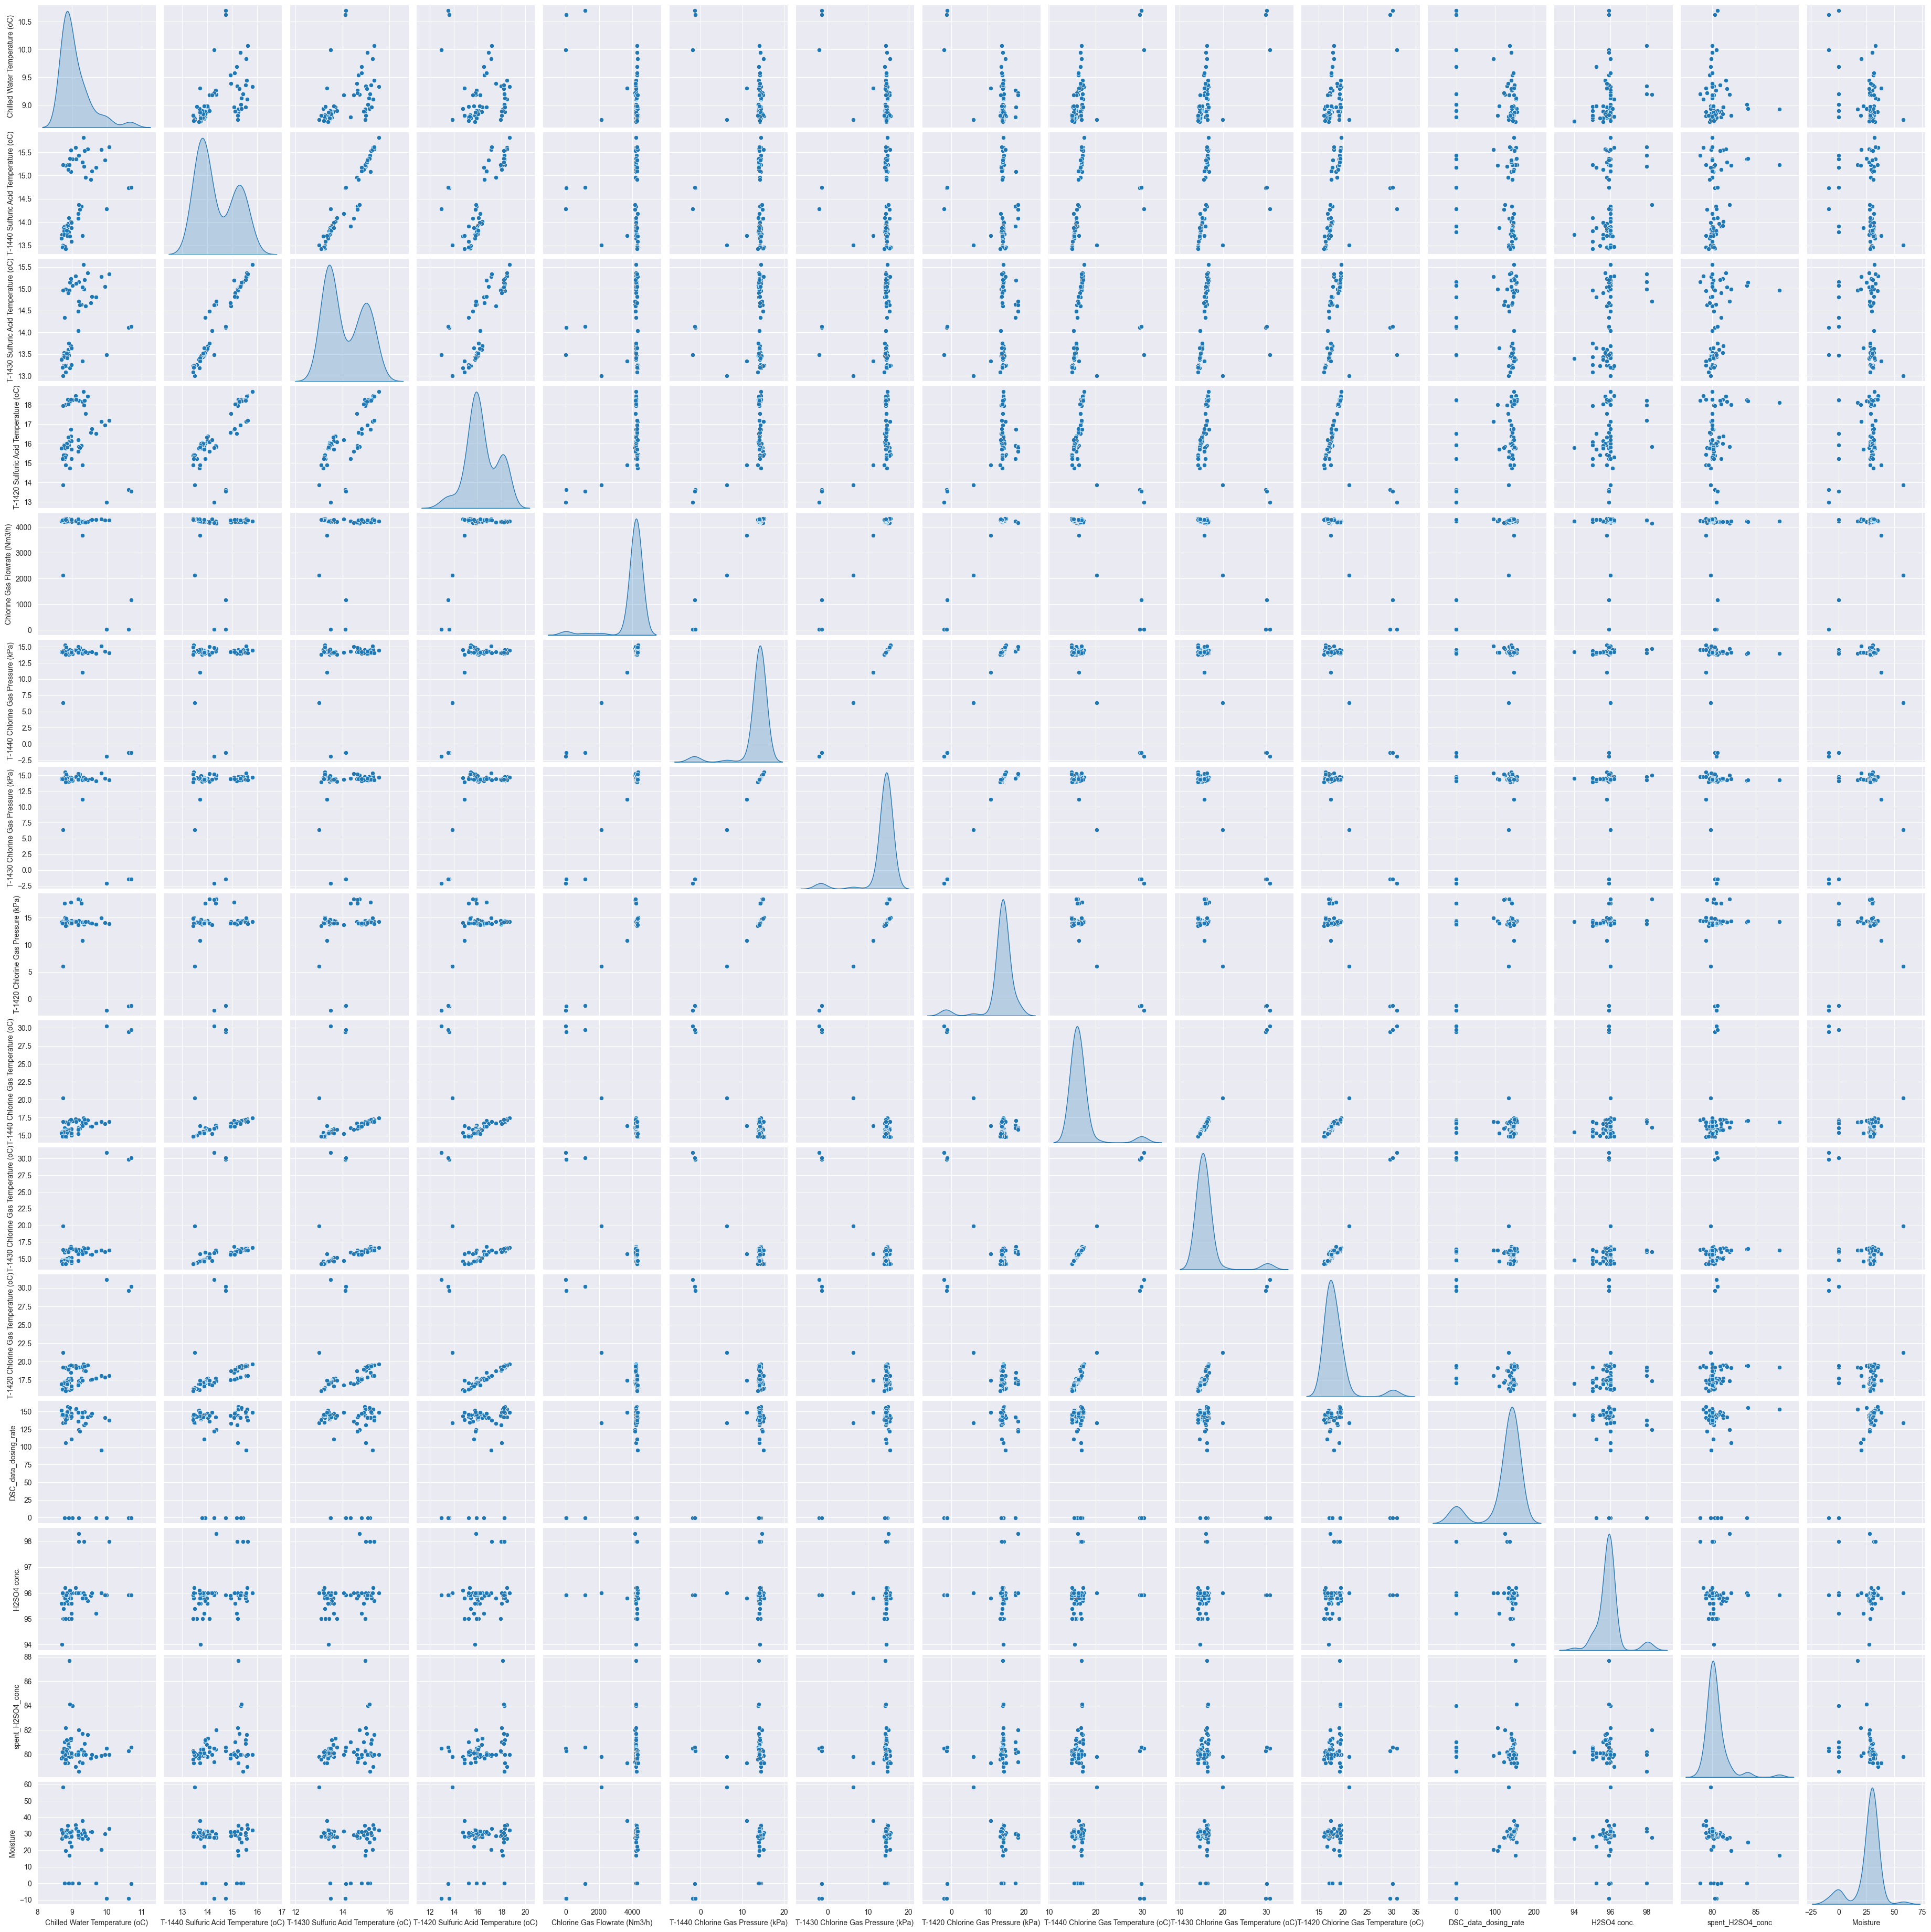

In [27]:
sns.pairplot(daily_avg ,diag_kind='kde')
# plt.xticks
plt.show()

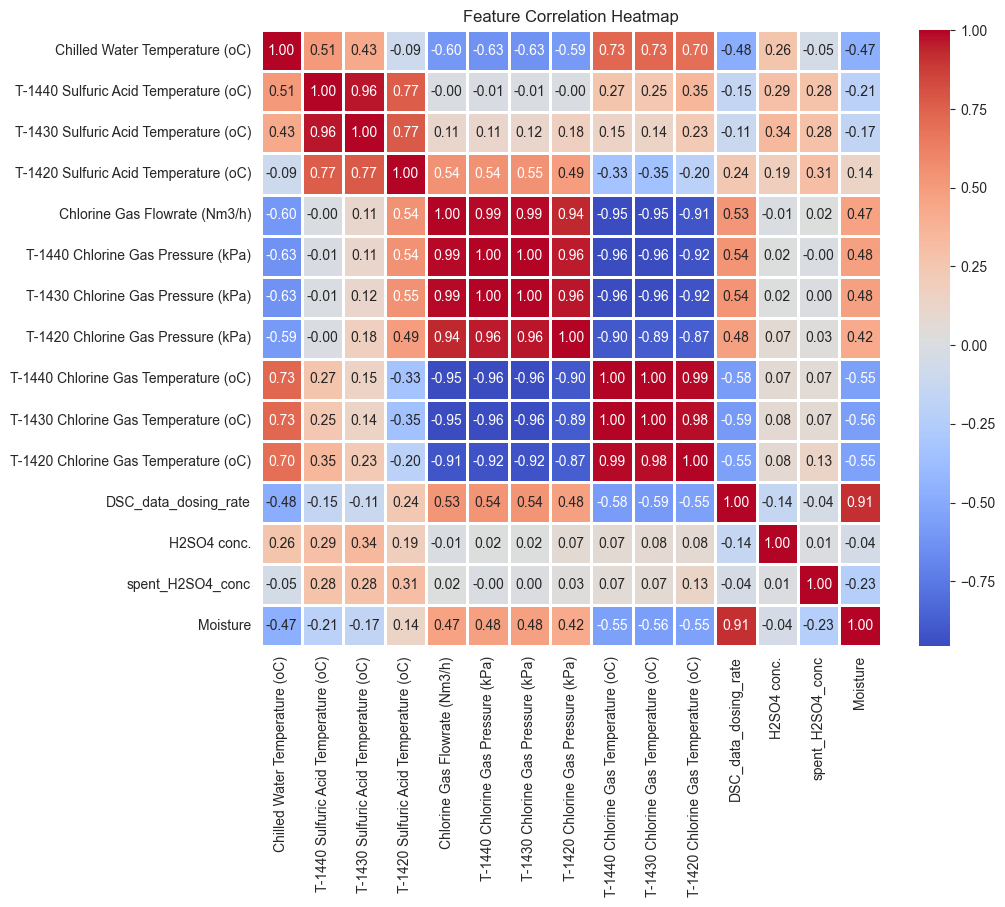

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
numeric_df = daily_avg.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.8)
plt.title("Feature Correlation Heatmap")
plt.show()

In [29]:

X = daily_avg[["Chilled Water Temperature (oC)","T-1440 Sulfuric Acid Temperature (oC)"	,"T-1430 Sulfuric Acid Temperature (oC)",	"T-1420 Sulfuric Acid Temperature (oC)",	"Chlorine Gas Flowrate (Nm3/h)",	"T-1440 Chlorine Gas Pressure (kPa)",	"T-1430 Chlorine Gas Pressure (kPa)"	,"T-1420 Chlorine Gas Pressure (kPa)"	,"T-1440 Chlorine Gas Temperature (oC)"	,"T-1430 Chlorine Gas Temperature (oC)",	"T-1420 Chlorine Gas Temperature (oC)",	"H2SO4 conc."	,"Moisture"]]
y = daily_avg['DSC_data_dosing_rate']  # Target

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the split
print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)

Training data size: (54, 13)
Testing data size: (14, 13)


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Example dataset
from sklearn.datasets import make_regression
# List of regression models to apply
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regression": SVR(),
    "KNN Regression": KNeighborsRegressor()
}

# Evaluate each model
results = []

for name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({"Model": name, "RMSE": rmse})

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)

                       Model       RMSE
0          Linear Regression  38.406641
1           Ridge Regression  26.042873
2           Lasso Regression  36.042764
3              Decision Tree  14.189729
4              Random Forest  13.047858
5          Gradient Boosting  13.860915
6  Support Vector Regression   7.862338
7             KNN Regression   9.027890


# prediction


In [34]:
svr_model = models["Support Vector Regression"]
X_new=np.array([["8.963711",	"15.081006",	"15.197703",	"16.727859"	,"4220.014443",	"14.447556"	,"14.691228" ,	"17.809678" ,	"17.089994"	,"16.803816",	"18.536427" , "96.000000" ,	"20.411"]])
result=svr_model.predict(X_new)
print("H2SO4 dosing rate:", round(result[0] ,2), "L/H")    

H2SO4 dosing rate: 139.92 L/H
